In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader.data as web

%matplotlib inline

In [2]:
nwalks = 5000
nsteps = 1000
raw_steps = np.random.randint(0, 2, (nwalks, nsteps))

In [3]:
steps = np.where(raw_steps>0, 1, -1)

In [4]:
dist = steps.cumsum(1)

In [5]:
dist

array([[  1,   0,   1, ...,  -4,  -3,  -4],
       [ -1,  -2,  -3, ...,  58,  59,  58],
       [  1,   0,  -1, ..., -24, -25, -26],
       ...,
       [ -1,  -2,  -3, ...,  62,  61,  60],
       [  1,   0,  -1, ..., -42, -43, -42],
       [ -1,  -2,  -1, ...,  22,  23,  22]])

In [6]:
dist.max()

118

In [7]:
dist.min()

-117

In [78]:
i = 2*np.arange(2)
j = 2*np.arange(2)+1
print(i,j)
plt.plot(dist[:,i], dist[:,j])

[0 2] [1 3]


TypeError: only integer scalar arrays can be converted to a scalar index

In [9]:
hit = (np.abs(dist)>=30).any(1)
hit.sum()

3388

In [10]:
import pandas as pd

In [11]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [12]:
frame = pd.DataFrame(data)

In [13]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [14]:
pd.DataFrame?

In [15]:
frame2 = pd.DataFrame(data, columns =['year','state','pop'])

In [16]:
frame2['eastern'] = frame2.state == 'Ohio'

In [17]:
frame2

,year,state,pop,eastern
0,2000,Ohio,1.5,True
1,2001,Ohio,1.7,True
2,2002,Ohio,3.6,True
3,2001,Nevada,2.4,False
4,2002,Nevada,2.9,False
5,2003,Nevada,3.2,False


In [18]:
ser1 = frame.loc[2]
ser1

state    Ohio
year     2002
pop       3.6
Name: 2, dtype: object

In [19]:
# странно что нельзя этим пользоваться, возможно в моменте было бы полезно
ser1['state'] = 'montana' 

C:\Users\g.ermolaev\AppData\Local\Temp\ipykernel_7512\406532368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ser1['state'] = 'montana'


In [20]:
frame2

,year,state,pop,eastern
0,2000,Ohio,1.5,True
1,2001,Ohio,1.7,True
2,2002,Ohio,3.6,True
3,2001,Nevada,2.4,False
4,2002,Nevada,2.9,False
5,2003,Nevada,3.2,False


In [21]:
city1 = {'minsk':
         {'lenin':10, 'arch':8},
         'baranovichi':
         {'lenin':100, 'arch':0, 'people':'est\''}
        }
city2 = {'moskow':
         {'lenin':1, 'arch':10, 'people':'mnoga'},
         'piter':
         {'lenin':0, 'arch':1100, 'people':'solevie'}
        }
test_dict = {'Belarus':city1,'Russia':city2}

In [22]:
test_dict

{'Belarus': {'minsk': {'lenin': 10, 'arch': 8},
  'baranovichi': {'lenin': 100, 'arch': 0, 'people': "est'"}},
 'Russia': {'moskow': {'lenin': 1, 'arch': 10, 'people': 'mnoga'},
  'piter': {'lenin': 0, 'arch': 1100, 'people': 'solevie'}}}

In [23]:
# тестик на дважды вложенный список результат не удовлетворил ожидание
pd.DataFrame(test_dict)

,Belarus,Russia
minsk,"{'lenin': 10, 'arch': 8}",NaN
baranovichi,"{'lenin': 100, 'arch': 0, 'people': 'est''}",NaN
moskow,NaN,"{'lenin': 1, 'arch': 10, 'people': 'mnoga'}"
piter,NaN,"{'lenin': 0, 'arch': 1100, 'people': 'solevie'}"


In [24]:
frame2.T

,0,1,2,3,4,5
year,2000,2001,2002,2001,2002,2003
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada
pop,1.5,1.7,3.6,2.4,2.9,3.2
eastern,True,True,True,False,False,False


In [25]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),index=['a', 'c', 'd'],columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [26]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [27]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [28]:
"""states = ['Texas', 'Utah', 'California']
frame.loc[['a', 'c', 'd',],states]"""

"states = ['Texas', 'Utah', 'California']\nframe.loc[['a', 'c', 'd',],states]"

In [29]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [30]:
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [31]:
np.arange(4., 0., -1)

array([4., 3., 2., 1.])

In [32]:
obj = pd.Series(np.arange(4., 0., -1), index=['a', 'b', 'c', 'd'])

In [33]:
obj[1]

3.0

In [34]:
#тест на :: пока не очень понятно как работает с pd.DF
frame[::3]

,Ohio,Texas,California
a,0,1,2


In [35]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), index=['Ohio', 'Colorado', 'Utah', 'New York'], columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [36]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [37]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [38]:
# tak mozhno vnosit' nazvane kolonok uffff
list('abcde')

['a', 'b', 'c', 'd', 'e']

In [39]:
1/frame == frame.rdiv(1)

,Ohio,Texas,California
a,True,True,True
c,True,True,True
d,True,True,True


In [40]:
frame = pd.DataFrame(np.random.rand(4,4),columns=list('abcd'),index=(np.arange(4)))

In [41]:
frame

,a,b,c,d
0,0.587105,0.644703,0.663683,0.946567
1,0.489683,0.821602,0.345775,0.568680
2,0.930540,0.405358,0.609703,0.027342
3,0.550343,0.822010,0.588326,0.672829


In [42]:
#ufffff moshch
function = lambda x: x.max() - x.min()

In [43]:
frame.apply(function, axis=1)

0    0.359462
1    0.475827
2    0.903198
3    0.271667
dtype: float64

In [44]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj2 = obj.sort_index()
# copy test
obj2['d'] = 10
obj

d    0
a    1
b    2
c    3
dtype: int64

In [45]:
# ty stackoverflow

import yfinance as yfin
yfin.pdr_override()

In [46]:
all_data = {ticker: web.get_data_yahoo(ticker) for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume'] for ticker, data in all_data.items()})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [47]:
returns = price.pct_change()

In [48]:
returns.tail(10)

,AAPL,IBM,MSFT,GOOG
Date,,,,
2023-01-11 00:00:00-05:00,0.021112,0.003177,0.030238,0.033841
2023-01-12 00:00:00-05:00,-0.000599,0.001996,0.011621,-0.003794
2023-01-13 00:00:00-05:00,0.010119,0.002336,0.003019,0.009683
2023-01-17 00:00:00-05:00,0.008756,-0.004798,0.004682,-0.006897
2023-01-18 00:00:00-05:00,-0.005370,-0.032922,-0.018889,-0.004123
2023-01-19 00:00:00-05:00,0.000444,0.001496,-0.016454,0.023208
2023-01-20 00:00:00-05:00,0.019221,0.004125,0.035744,0.057182
2023-01-23 00:00:00-05:00,0.023500,0.004674,0.009824,0.019440
2023-01-24 00:00:00-05:00,0.010063,-0.002608,-0.002226,-0.019761


In [49]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.370319,0.429635,0.520359
IBM,0.370319,1.000000,0.446001,0.407555
MSFT,0.429635,0.446001,1.000000,0.564936
GOOG,0.520359,0.407555,0.564936,1.000000


In [50]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000799,0.000176,0.000252,0.000212
IBM,0.000176,0.000253,0.000164,0.000114
MSFT,0.000252,0.000164,0.000455,0.000189
GOOG,0.000212,0.000114,0.000189,0.000376


In [51]:
volume.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2023-01-19 00:00:00-05:00,58280400.0,4833900,28623000.0,28707700.0
2023-01-20 00:00:00-05:00,79972200.0,7152700,35323400.0,53610200.0
2023-01-23 00:00:00-05:00,81760300.0,5898400,31934000.0,31791800.0
2023-01-24 00:00:00-05:00,66435100.0,4407600,40234400.0,27391400.0
2023-01-25 00:00:00-05:00,65652500.0,7285300,66459300.0,30959100.0


In [52]:
returns.corrwith(volume)

AAPL    0.000637
IBM    -0.010926
MSFT   -0.005668
GOOG    0.039815
dtype: float64

In [53]:
returns.corrwith(volume, axis='columns')

Date
1962-01-02 00:00:00-05:00         NaN
1962-01-03 00:00:00-05:00         NaN
1962-01-04 00:00:00-05:00         NaN
1962-01-05 00:00:00-05:00         NaN
1962-01-08 00:00:00-05:00         NaN
                               ...   
2023-01-19 00:00:00-05:00   -0.031285
2023-01-20 00:00:00-05:00    0.371259
2023-01-23 00:00:00-05:00    0.859857
2023-01-24 00:00:00-05:00    0.556225
2023-01-25 00:00:00-05:00    0.261912
Length: 15372, dtype: float64

In [54]:
#nah 
returns.IBM.sort_values

<bound method Series.sort_values of Date
1962-01-02 00:00:00-05:00         NaN
1962-01-03 00:00:00-05:00    0.008742
1962-01-04 00:00:00-05:00   -0.009966
1962-01-05 00:00:00-05:00   -0.019693
1962-01-08 00:00:00-05:00   -0.018751
                               ...   
2023-01-19 00:00:00-05:00    0.001496
2023-01-20 00:00:00-05:00    0.004125
2023-01-23 00:00:00-05:00    0.004674
2023-01-24 00:00:00-05:00   -0.002608
2023-01-25 00:00:00-05:00   -0.005159
Name: IBM, Length: 15372, dtype: float64>

In [55]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

In [80]:
result = pd.read_csv('examples/ex5.csv', na_values=['NULL'])

In [81]:
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [82]:
!cat examples/ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


In [85]:
with open('examples/ex7.csv', 'a') as file:
    file.write(r',"4"')

In [87]:
!cat examples/ex7.csv

"a,""b"",""c"""
"1,""2"",""3"""
"1,""2"",""3"",""4"""


In [100]:
lines = (['a', 'b', 'c'],
['1', '2', '3'],
['1', '2', '3', '4'])

In [101]:
header, values = lines[0], lines[1:]

In [2]:
from lxml import objectify
path = 'datasets/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

In [4]:
data = []
skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ','DESIRED_CHANGE', 'DECIMAL_PLACES']
for elt in root.INDICATOR:
     el_data = {}
     for child in elt.getchildren():
         if child.tag in skip_fields:
             continue
         el_data[child.tag] = child.pyval
         data.append(el_data)

In [7]:
 perf = pd.DataFrame(data)

In [8]:
perf.head()

,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,INDICATOR_UNIT,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,%,95.0,96.9,95.0,96.9
1,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,%,95.0,96.9,95.0,96.9
2,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,%,95.0,96.9,95.0,96.9
3,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,%,95.0,96.9,95.0,96.9
4,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,%,95.0,96.9,95.0,96.9


In [4]:
meat = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami','corned beef', 'Bacon', 'pastrami', 'honey ham','nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [5]:
meat

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [6]:
meat_to_animal = {
'bacon' : 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

In [7]:
# map method 1st variant
lowercased = meat['food'].str.lower()
meat['animal'] = lowercased.map(meat_to_animal)

In [8]:
meat

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [23]:
meat.drop(columns='animal', inplace=True)

In [24]:
# same result but 1 line
meat.insert(value = meat['food'].map(lambda x: meat_to_animal[x.lower()]), column = 'animal', loc = 2)
meat

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [29]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
cut_1st = pd.cut(ages, [18, 26, 36, 61, 100], right=False)
cut_1st.categories

IntervalIndex([[18, 26), [26, 36), [36, 61), [61, 100)], dtype='interval[int64, left]')

In [30]:
data1 = np.random.randn(1000)

In [39]:
pd.value_counts(pd.qcut(data1, [0, 0.11, 0.35, 0.8, 1.]))

(-0.352, 0.887]     450
(-1.223, -0.352]    240
(0.887, 3.284]      200
(-3.331, -1.223]    110
dtype: int64

In [40]:
pd.any?

Object `pd.any` not found.


In [42]:
pd.DataFrame.any??

In [58]:
data = pd.DataFrame(np.random.randn(100, 100))
data[(np.abs(data) > 2.5).any(axis = 1)]

In [65]:
data2 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})
data2

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [69]:
pd.get_dummies(data2['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [2]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [3]:
all_genres = []
movies.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
for x in movies.genres:
    all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [27]:
dummies.

RangeIndex(start=0, stop=3883, step=1)

In [13]:
dummies[dummies['Comedy'].bool() & 
        dummies['Children\'s'].bool()]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [5]:
dummies_empty = np.zeros((len(movies),len(genres)))
dummies = pd.DataFrame(dummies_empty,columns=genres)
dummies

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# медленныйы душный способ
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [17]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1':range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data1':range(3)})
df1


,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [14]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [31]:
pd.merge(df1, df2,how = 'inner', on = 'key', indicator=True)

,key,data1,data2,_merge
0,b,0,1,both
1,b,0,3,both
2,b,1,1,both
3,b,1,3,both
4,b,5,1,both
5,b,5,3,both
6,a,2,0,both
7,a,2,2,both
8,a,4,0,both
9,a,4,2,both


In [26]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],'data2': range(5)})
pd.merge(df1, df2, on='key', how='right')

,key,data1,data2
0,a,2.0,0
1,a,4.0,0
2,b,0.0,1
3,b,1.0,1
4,b,5.0,1
5,a,2.0,2
6,a,4.0,2
7,b,0.0,3
8,b,1.0,3
9,b,5.0,3


In [33]:
# definition of concatenation in pandas
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [35]:
pd.concat([s1, s2, s3],axis = 1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [36]:
s4 = pd.concat([s1, s3])
#какие метки будут использоваться на других осях помощью параметра join_axes:
#or u cant.(cunt///)
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

TypeError: concat() got an unexpected keyword argument 'join_axes'

In [39]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64), index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan

In [42]:
b,a

(f    0.0
 e    1.0
 d    2.0
 c    3.0
 b    4.0
 a    NaN
 dtype: float64,
 f    NaN
 e    2.5
 d    NaN
 c    3.5
 b    4.5
 a    NaN
 dtype: float64)

In [41]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [44]:
a.combine_first(b)

f    0.0
e    2.5
d    2.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [53]:
# nuzhno cheknut' na df
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],'b': [np.nan, 2., np.nan, 6.],'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],'b': [np.nan, 3., 4., 6., 8.]}) 
df1, df2

(     a    b   c
 0  1.0  NaN   2
 1  NaN  2.0   6
 2  5.0  NaN  10
 3  NaN  6.0  14,
      a    b
 0  5.0  NaN
 1  4.0  3.0
 2  NaN  4.0
 3  3.0  6.0
 4  7.0  8.0)

In [51]:
df2.combine_first(df1)

,a,b,c
0,5.0,NaN,2.0
1,4.0,3.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [54]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [55]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [56]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [2]:
data = pd.read_csv('examples/macrodata.csv')

In [3]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,name='date')

In [4]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')

In [5]:
data = data.reindex(columns=columns)

In [6]:
data.index = periods.to_timestamp('D', 'end')

In [11]:
ldata = data.stack()


In [12]:
ldata

date                           item   
1959-03-31 23:59:59.999999999  realgdp     2710.349
                               infl           0.000
                               unemp          5.800
1959-06-30 23:59:59.999999999  realgdp     2778.801
                               infl           2.340
                                            ...    
2009-06-30 23:59:59.999999999  infl           3.370
                               unemp          9.200
2009-09-30 23:59:59.999999999  realgdp    12990.341
                               infl           3.560
                               unemp          9.600
Length: 609, dtype: float64

In [14]:
data_orig = pd.read_csv('examples/macrodata.csv')

In [15]:
data_orig 

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [16]:
pd.melt(data_orig, ["year",'quarter'])

,year,quarter,variable,value
0,1959.0,1.0,realgdp,2710.349
1,1959.0,2.0,realgdp,2778.801
2,1959.0,3.0,realgdp,2775.488
3,1959.0,4.0,realgdp,2785.204
4,1960.0,1.0,realgdp,2847.699
...,...,...,...,...
2431,2008.0,3.0,realint,4.330
2432,2008.0,4.0,realint,8.910
2433,2009.0,1.0,realint,-0.710
2434,2009.0,2.0,realint,-3.190


In [17]:
%matplotlib notebook

In [18]:
data = np.arange(10)

<IPython.core.display.Javascript object>


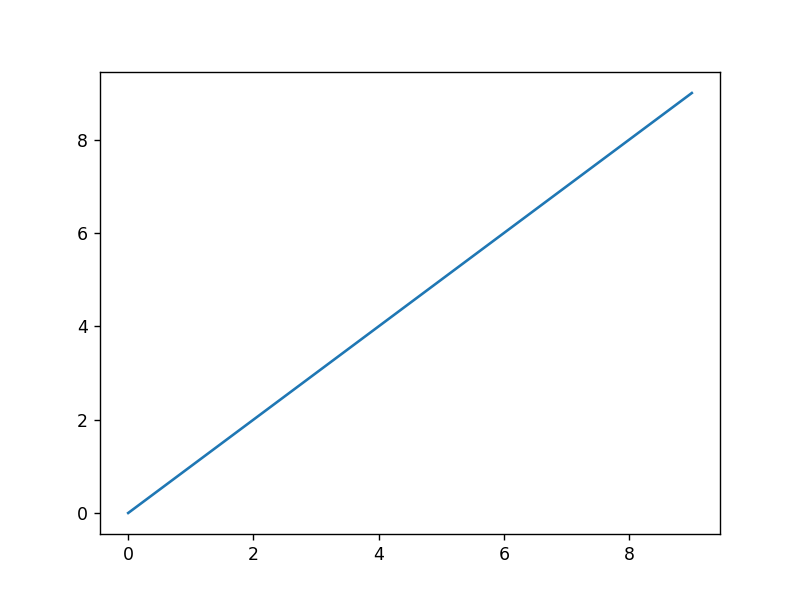

In [19]:
plt.plot(data)

<IPython.core.display.Javascript object>


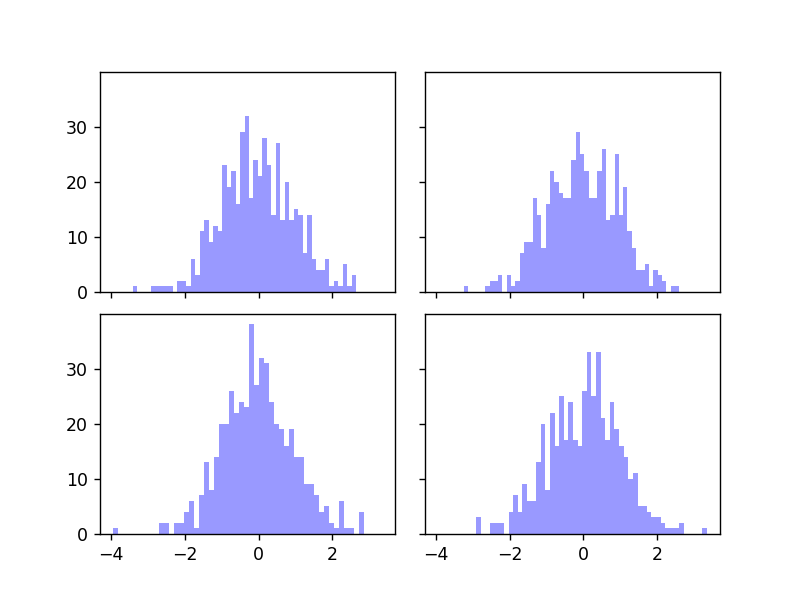

In [32]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
     for j in range(2):
         axes[i, j].hist(np.random.randn(500), bins=50, color=['b'], alpha=0.4)
     plt.subplots_adjust(wspace=0.1, hspace=0.1)

In [33]:
plt.plot?

# Агрегирование данных

In [6]:
df = pd.DataFrame({'key1':list('abaab'),
                  'key2':['first','first','first','second','second'],
                  'value1':np.random.randn(5),
                  'value2':np.arange(2,12,2)})
df

,key1,key2,value1,value2
0,a,first,0.181050,2
1,b,first,0.082526,4
2,a,first,-0.368351,6
3,a,second,-0.098458,8
4,b,second,-3.407195,10


In [10]:
year = [2020, 2022, 2020, 2022, 2022]

In [12]:
year_avarage = df.value1.groupby(year).mean()

In [13]:
year_avarage

2020   -0.147577
2022   -0.193996
Name: value1, dtype: float64

In [17]:
df.groupby('key1').mean(numeric_only=1)

,value1,value2
key1,,
a,-0.633161,5.333333
b,0.511169,7.000000


In [4]:
df.groupby('key1').size()

key1
a    3
b    2
dtype: int64

In [7]:
# wat in iterator check?
j = 0
for name, group in df.groupby('key1'):
    print (name)
    print (group)
    j = j + 1
    print(f'номер цикла = {j}')

SyntaxError: f-string: expecting '}' (1169116619.py, line 6)

In [9]:
 df.groupby(['key1', 'key2'])[['value1']].mean()

value1
key1 key2            
a    first  -0.176492
     second -0.047894
b    first   0.997286
     second  0.056284

In [10]:
 df.groupby(['key1', 'key2'])['value1'].mean()

key1  key2  
a     first    -0.176492
      second   -0.047894
b     first     0.997286
      second    0.056284
Name: value1, dtype: float64

In [11]:
print(type( df.groupby(['key1', 'key2'])['value1'].mean()))
print(type( df.groupby(['key1', 'key2'])[['value1']].mean()))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [2]:
# Группировка с  помощью словарей и  объектов Series
people = pd.DataFrame(np.random.randn(5, 5),columns=['a', 'b', 'c', 'd', 'e'],index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan
people

,a,b,c,d,e
Joe,0.758244,-1.241758,0.657462,-0.506377,3.411227
Steve,1.355702,-0.575765,0.882857,0.161422,-0.906879
Wes,-0.995181,NaN,NaN,1.508570,-0.107571
Jim,1.045192,-0.676033,0.756709,0.803705,-0.133573
Travis,-1.780968,-0.331727,-0.428664,1.032687,1.135194


In [4]:
people.groupby(len)

In [5]:
for name,group in people.groupby(len):
    print(name)
    print(group)
    

3
            a         b         c         d         e
Joe  0.758244 -1.241758  0.657462 -0.506377  3.411227
Wes -0.995181       NaN       NaN  1.508570 -0.107571
Jim  1.045192 -0.676033  0.756709  0.803705 -0.133573
5
              a         b         c         d         e
Steve  1.355702 -0.575765  0.882857  0.161422 -0.906879
6
               a         b         c         d         e
Travis -1.780968 -0.331727 -0.428664  1.032687  1.135194


In [7]:
df

,key1,key2,value1,value2
0,a,first,0.181050,2
1,b,first,0.082526,4
2,a,first,-0.368351,6
3,a,second,-0.098458,8
4,b,second,-3.407195,10


In [16]:
grouped = df.groupby('key1')
grouped['value1'].quantile(0.95)

key1
a    0.15310
b   -0.09196
Name: value1, dtype: float64

In [2]:
tips = pd.read_csv('examples/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']


In [19]:
tips.head(6)

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [21]:
grouped = tips.groupby(['day', 'smoker'])
grouped

In [24]:
for name,group in grouped:
    print(name)
    print(group)

('Fri', 'No')
     total_bill   tip smoker  day    time  size   tip_pct
91        22.49  3.50     No  Fri  Dinner     2  0.155625
94        22.75  3.25     No  Fri  Dinner     2  0.142857
99        12.46  1.50     No  Fri  Dinner     2  0.120385
223       15.98  3.00     No  Fri   Lunch     3  0.187735
('Fri', 'Yes')
     total_bill   tip smoker  day    time  size   tip_pct
90        28.97  3.00    Yes  Fri  Dinner     2  0.103555
92         5.75  1.00    Yes  Fri  Dinner     2  0.173913
93        16.32  4.30    Yes  Fri  Dinner     2  0.263480
95        40.17  4.73    Yes  Fri  Dinner     4  0.117750
96        27.28  4.00    Yes  Fri  Dinner     2  0.146628
97        12.03  1.50    Yes  Fri  Dinner     2  0.124688
98        21.01  3.00    Yes  Fri  Dinner     2  0.142789
100       11.35  2.50    Yes  Fri  Dinner     2  0.220264
101       15.38  3.00    Yes  Fri  Dinner     2  0.195059
220       12.16  2.20    Yes  Fri   Lunch     2  0.180921
221       13.42  3.48    Yes  Fri   Lunch  

In [26]:
grouped_pct = grouped['tip_pct']
for name,group in grouped_pct:
    print(name)
    print(group)

('Fri', 'No')
91     0.155625
94     0.142857
99     0.120385
223    0.187735
Name: tip_pct, dtype: float64
('Fri', 'Yes')
90     0.103555
92     0.173913
93     0.263480
95     0.117750
96     0.146628
97     0.124688
98     0.142789
100    0.220264
101    0.195059
220    0.180921
221    0.259314
222    0.223776
224    0.117735
225    0.153657
226    0.198216
Name: tip_pct, dtype: float64
('Sat', 'No')
19     0.162228
20     0.227679
21     0.135535
22     0.141408
23     0.192288
24     0.160444
25     0.131387
26     0.149589
27     0.157604
28     0.198157
29     0.152672
30     0.151832
31     0.136240
32     0.199203
33     0.118415
34     0.183915
35     0.149626
36     0.122624
37     0.181335
38     0.123596
39     0.159898
40     0.139651
57     0.056797
59     0.139424
64     0.150085
65     0.156873
66     0.150152
68     0.099357
70     0.163894
71     0.175747
74     0.149355
75     0.118934
104    0.195029
108    0.206140
110    0.214286
111    0.137931
212    0.186220
2

In [32]:
grouped_pct.aggregate("mean")

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [30]:
grouped_pct.agg('min')

day   smoker
Fri   No        0.120385
      Yes       0.103555
Sat   No        0.056797
      Yes       0.035638
Sun   No        0.059447
      Yes       0.065660
Thur  No        0.072961
      Yes       0.090014
Name: tip_pct, dtype: float64

In [39]:
pd.DataFrame.aggregate??

In [4]:
# нахождение квантилей и их последующая группировка
data = pd.DataFrame({'data1':np.random.randn(1000),
                    'data2':np.random.randn(1000)})
quantiles = pd.cut(data['data1'], 4)
quantiles.head(10)

0      (0.131, 1.688]
1    (-2.988, -1.425]
2      (0.131, 1.688]
3     (-1.425, 0.131]
4     (-1.425, 0.131]
5     (-1.425, 0.131]
6     (-1.425, 0.131]
7      (0.131, 1.688]
8      (1.688, 3.244]
9    (-2.988, -1.425]
Name: data1, dtype: category
Categories (4, interval[float64, right]): [(-2.988, -1.425] < (-1.425, 0.131] < (0.131, 1.688] < (1.688, 3.244]]

In [59]:
def get_stats(group):
    return {'min': group.min().round(2), 'max': group.max().round(2), 'count': group.count(), 'mean': group.mean().round(2)}

In [84]:
grouped = data.data1.groupby(quantiles)
for name,group in grouped:
    print(f'{name} is \n{len(group)}')

(-2.988, -1.425] is 
65
(-1.425, 0.131] is 
498
(0.131, 1.688] is 
385
(1.688, 3.244] is 
52


In [88]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-2.988, -1.425]",-2.98,-1.43,65.0,-1.87
"(-1.425, 0.131]",-1.42,0.13,498.0,-0.54
"(0.131, 1.688]",0.13,1.68,385.0,0.74
"(1.688, 3.244]",1.69,3.24,52.0,2.07


In [43]:
print(
type(grouped.apply(get_stats)),
type(grouped.apply(get_stats).unstack()))

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


In [70]:
# stackoverflow quastion
df1 = pd.DataFrame({"ID": [1, 2, 3, 4, 5], "DOB": ["1987-12-03", "1993-04-05", "2000-01-24", "1995-05-18", "1974-10-10"], "JOB": [6, 7, 8, 9, 10]})
df2 = pd.DataFrame({"ID": [1, 1, 2, 3, 3, 4, 4], "DOB": ["1987-12-03", "1999-06-16", "1993-04-05", "2000-01-24", "1968-11-13", "1995-05-18", "1988-12-12"], "JOB": [6, 11, 7, 8, 12, 9, 13]})

In [71]:
df1

,ID,DOB,JOB
0,1,1987-12-03,6
1,2,1993-04-05,7
2,3,2000-01-24,8
3,4,1995-05-18,9
4,5,1974-10-10,10


In [72]:
df2

,ID,DOB,JOB
0,1,1987-12-03,6
1,1,1999-06-16,11
2,2,1993-04-05,7
3,3,2000-01-24,8
4,3,1968-11-13,12
5,4,1995-05-18,9
6,4,1988-12-12,13


In [79]:
pd.merge(df1,df2)

,ID,DOB,JOB
0,1,1987-12-03,6
1,2,1993-04-05,7
2,3,2000-01-24,8
3,4,1995-05-18,9


In [80]:
df1.merge(df2.drop('JOB', axis=1), on=['ID', 'DOB'], how='inner')

,ID,DOB,JOB
0,1,1987-12-03,6
1,2,1993-04-05,7
2,3,2000-01-24,8
3,4,1995-05-18,9


In [89]:
states = ['Ohio', 'New York', 'Vermont', 'Florida','Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan


In [90]:
data.groupby(group_key).mean()

East   -0.725664
West    0.138003
dtype: float64

In [91]:
fill_mean = lambda g: g.fillna(g.mean())

In [94]:
data.groupby(group_key, group_keys=True).apply(fill_mean)

East  Ohio         -1.152321
      New York      0.276779
      Vermont      -0.725664
      Florida      -1.301451
West  Oregon       -0.289959
      Nevada        0.138003
      California    0.565965
      Idaho         0.138003
dtype: float64

In [96]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

C:\Users\g.ermolaev\AppData\Local\Temp\ipykernel_2792\2621590873.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data.groupby(group_key).apply(fill_func)


Ohio         -1.152321
New York      0.276779
Vermont       0.500000
Florida      -1.301451
Oregon       -0.289959
Nevada       -1.000000
California    0.565965
Idaho        -1.000000
dtype: float64

In [9]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [3]:
tips.pivot_table(index=['day', 'smoker'])

C:\Users\g.ermolaev\AppData\Local\Temp\ipykernel_5756\3866019331.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  tips.pivot_table(index=['day', 'smoker'])


size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [11]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [14]:
np.average([2.000000,2.555556,2.929825,2.000000])

2.37134525

In [15]:
np.average([3.000000,2.500000])

2.75

In [17]:
np.average([2.75,2.37134525])

2.560672625

In [18]:
pd.DataFrame.pivot_table?